Датасет собран с помощью онлайн опроса. Анкета онлайн-опроса включает поведенческую, психографическую, географическую и демографическую информацию об армянских пабах.

Эти данные предназначены для независимого проекта, организованного студентами Американского университета Армении в образовательных целях.

`Age` - Возраст, количественная переменная 

`Gender` - Пол, категориальная переменная

`Income` - Примерный ежемесячный доход респондента (в армянских драмах), количественная переменная

`Occupation` - Профессия, категориальная переменная

`Fav_Pub` - Любимый паб, категориальная переменная

`WTS` - Максимальное количество денег, которое респондент готов потретить в пабе, количественная переменная

`Freq` - Частота посещения пабов, категориальная переменная

`Prim_Imp` - Причина посещения паба первостепенной важности для респондента, категориальная переменная

`Sec_Imp` - Вторая по важности причина, по которой респондент посещает паб, категориальная переменная

`Stratum` - Место жительства, категориальная переменная

`Lifestyle` - Образ жизни, категориальная переменная

`Occasions` - Наиболее частые обстоятельства посещения паба, категориальная переменная

`Timestamp` - Дата и время занесения данных в набор






In [349]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 10)

In [350]:
armenian_pubs = pd.read_csv('armenian_pubs.csv')
armenian_pubs.head()

,Timestamp,Age,Gender,Income,Occupation,Fav_Pub,WTS,Freq,Prim_Imp,Sec_Imp,Stratum,Lifestyle,Occasions
0,2017/02/25 10:52:03 PM GMT+4,19,Male,100000.0,Student,Station,2000.0,Several times in a month,Environment,Menu,Capital,Nightlife,Hang outs with friends
1,2017/02/25 10:53:19 PM GMT+4,19,Female,50000.0,Student,Calumet,2000.0,rarely (once two week/or a month),Music,Pricing,Capital,Adventure/traveling/exploring,Hang outs with friends
2,2017/02/25 10:54:05 PM GMT+4,20,Male,100000.0,Student,Liberty,3000.0,rarely (once two week/or a month),Environment,Music,Capital,"Busy(student life, work)",Hang outs with friends
3,2017/02/25 10:55:09 PM GMT+4,18,Male,0.0,Student,Calumet,3000.0,Several times in a month,Environment,Music,Capital,Art,Hang outs with friends
4,2017/02/25 10:55:38 PM GMT+4,19,Female,130000.0,Student + working,Liberty,10000.0,rarely (once two week/or a month),Pricing,Environment,Capital,NaN,Hang outs with friends


In [351]:
armenian_pubs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 13 columns):
Timestamp      175 non-null object
Age            175 non-null int64
Gender         175 non-null object
Income         174 non-null float64
 Occupation    175 non-null object
Fav_Pub        168 non-null object
WTS            172 non-null float64
Freq           175 non-null object
Prim_Imp       175 non-null object
Sec_Imp        175 non-null object
Stratum        175 non-null object
Lifestyle      169 non-null object
Occasions      173 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 17.9+ KB


In [352]:
# Есть пропущенные значения + есть пробелы в названиях
armenian_pubs.columns = armenian_pubs.columns.str.strip()
armenian_pubs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 13 columns):
Timestamp     175 non-null object
Age           175 non-null int64
Gender        175 non-null object
Income        174 non-null float64
Occupation    175 non-null object
Fav_Pub       168 non-null object
WTS           172 non-null float64
Freq          175 non-null object
Prim_Imp      175 non-null object
Sec_Imp       175 non-null object
Stratum       175 non-null object
Lifestyle     169 non-null object
Occasions     173 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 17.9+ KB


In [353]:
armenian_pubs['Occupation'].unique()

array(['Student', 'Student + working', 'Working', 'CEO',
       'Entrepreneur / Software Engineer', 'army', 'Working '],
      dtype=object)

In [354]:
# посмотрим какое значение пропущено
armenian_pubs[armenian_pubs['Income'].isnull()]

,Timestamp,Age,Gender,Income,Occupation,Fav_Pub,WTS,Freq,Prim_Imp,Sec_Imp,Stratum,Lifestyle,Occasions
130,2017/02/27 10:00:03 PM GMT+4,19,Male,NaN,Student,Station,2000.0,Several times in a month,Pricing,Music,Capital,Sport,Hang outs with friends


In [355]:
# так как оно всего одно, обработаем вручную и внесем среднее по наиболее близким обьектам 
a = armenian_pubs[(armenian_pubs['Gender'] == 'Male') & (armenian_pubs['Occupation'] == 'Student') & (armenian_pubs['Age'] == 19)]['Income'].mean()

In [356]:
armenian_pubs.at[130, 'Income'] = a
armenian_pubs.iloc[130]

Timestamp     2017/02/27 10:00:03 PM GMT+4
Age                                     19
Gender                                Male
Income                               68125
Occupation                         Student
Fav_Pub                            Station
WTS                                   2000
Freq              Several times in a month
Prim_Imp                           Pricing
Sec_Imp                              Music
Stratum                            Capital
Lifestyle                            Sport
Occasions           Hang outs with friends
Name: 130, dtype: object

In [357]:
armenian_pubs[armenian_pubs['Fav_Pub'].isnull()] 

,Timestamp,Age,Gender,Income,Occupation,Fav_Pub,WTS,Freq,Prim_Imp,Sec_Imp,Stratum,Lifestyle,Occasions
30,2017/02/25 11:07:07 PM GMT+4,18,Female,0.0,Student,NaN,1500.0,Several times in a month,Environment,Menu,Capital,NaN,Hang outs with friends
42,2017/02/25 11:15:13 PM GMT+4,20,Male,200000.0,Student,NaN,2000.0,rarely (once two week/or a month),Environment,Pricing,Urban,Sport,Special events/parties
94,2017/02/26 11:14:33 AM GMT+4,23,Female,700000.0,Working,NaN,5000.0,rarely (once two week/or a month),Environment,Menu,Capital,"Busy(student life, work)",Hang outs with friends
109,2017/02/26 2:42:20 PM GMT+4,20,Male,60000.0,Student + working,NaN,5000.0,rarely (once two week/or a month),Music,Menu,Urban,Art,Hang outs with friends
131,2017/02/27 10:30:03 PM GMT+4,18,Female,100000.0,Student,NaN,10000.0,rarely (once two week/or a month),Environment,Music,Urban,"Busy(student life, work)",Birthdays
135,2017/03/02 1:46:19 AM GMT+4,23,Male,250000.0,Student + working,NaN,5000.0,Several times in a month,Environment,Pricing,Capital,"Busy(student life, work)",Hang outs with friends
167,2017/03/02 10:20:02 PM GMT+4,26,Male,190000.0,Working,NaN,10000.0,Several times in a month,Music,Environment,Capital,"Busy(student life, work)",Hang outs with friends


In [358]:
armenian_pubs['Fav_Pub'].unique()

array(['Station', 'Calumet', 'Liberty', 'Irish', "I don't like pubs",
       'Venue', 'VOID', 'DAS', '37 pub', 'Venue ', 'Cantaloupe', nan,
       'Tom Collins ', 'Bulldog', 'Pepper', 'Eden', 'Liberty ',
       'Hemingway', 'Void', 'I have none', 'Pub 37', 'Red bull',
       'Varonna', 'Barcode', 'Paparazzi ', 'Pechenu bagher', 'Dargett',
       'Pub 007', 'Do not have one', 'kaptyorka', 'DAS ', 'Paulaner',
       'Wild west', 'BullDog', 'Tom collins', "Bob's", 'Fiction',
       'Tom Collins', 'The beatles', 'Ulixanyan art club', 'Simona',
       'Speak Easy ', 'Beer Academy', 'Yankee', 'Beatles'], dtype=object)

In [359]:
armenian_pubs['Fav_Pub'].unique().size

45

In [360]:
armenian_pubs['Fav_Pub'] = armenian_pubs['Fav_Pub'].str.lower()
armenian_pubs['Fav_Pub'] = armenian_pubs['Fav_Pub'].str.strip()
armenian_pubs['Fav_Pub'].unique().size

38

In [361]:
# заменим поле none, чтобы в дальнейшем не было проблем с построением графиков например
armenian_pubs['Fav_Pub'] = armenian_pubs.Fav_Pub.fillna('EMPTY FIELD')

In [362]:
# заметим что пустое поле, нет любимого и не люблю бары - разные значения 
armenian_pubs.Fav_Pub = armenian_pubs.Fav_Pub.replace(['do not have one','i have none'], "no favorite")
armenian_pubs['Fav_Pub'].unique()

array(['station', 'calumet', 'liberty', 'irish', "i don't like pubs",
       'venue', 'void', 'das', '37 pub', 'cantaloupe', 'EMPTY FIELD',
       'tom collins', 'bulldog', 'pepper', 'eden', 'hemingway',
       'no favorite', 'pub 37', 'red bull', 'varonna', 'barcode',
       'paparazzi', 'pechenu bagher', 'dargett', 'pub 007', 'kaptyorka',
       'paulaner', 'wild west', "bob's", 'fiction', 'the beatles',
       'ulixanyan art club', 'simona', 'speak easy', 'beer academy',
       'yankee', 'beatles'], dtype=object)

In [363]:
# Интересная категория людей - не любят пабы, но посещают их и тратят деньги !
armenian_pubs[armenian_pubs['Fav_Pub'] == "i don't like pubs"]

,Timestamp,Age,Gender,Income,Occupation,Fav_Pub,WTS,Freq,Prim_Imp,Sec_Imp,Stratum,Lifestyle,Occasions
8,2017/02/25 10:56:17 PM GMT+4,19,Male,80000.0,Student + working,i don't like pubs,10000.0,rarely (once two week/or a month),Environment,Music,Capital,Adventure/traveling/exploring,Hang outs with friends
10,2017/02/25 10:56:52 PM GMT+4,20,Female,80000.0,Student,i don't like pubs,3000.0,rarely (once two week/or a month),Environment,Menu,Capital,Art,Special events/parties
17,2017/02/25 10:59:25 PM GMT+4,19,Female,50000.0,Student,i don't like pubs,8000.0,rarely (once two week/or a month),Environment,Music,Rural,"Sport, art, traveling",Birthdays
19,2017/02/25 10:59:52 PM GMT+4,19,Female,200000.0,Student + working,i don't like pubs,2000.0,rarely (once two week/or a month),Environment,Music,Urban,Adventure/traveling/exploring,Birthdays
45,2017/02/25 11:22:14 PM GMT+4,20,Female,100000.0,Student + working,i don't like pubs,2000.0,rarely (once two week/or a month),Environment,Menu,Capital,Adventure/traveling/exploring,Birthdays
57,2017/02/25 11:58:45 PM GMT+4,20,Female,0.0,Student,i don't like pubs,1000.0,rarely (once two week/or a month),Environment,Music,Capital,Passive,Special events/parties
58,2017/02/26 12:06:19 AM GMT+4,20,Male,60000.0,Student,i don't like pubs,4000.0,rarely (once two week/or a month),Environment,Music,Capital,"Busy(student life, work)",Hang outs with friends
60,2017/02/26 12:23:24 AM GMT+4,20,Female,70000.0,Student,i don't like pubs,5000.0,rarely (once two week/or a month),Environment,Music,Capital,"Busy(student life, work)",Birthdays
67,2017/02/26 12:38:48 AM GMT+4,21,Male,200000.0,Student + working,i don't like pubs,0.0,rarely (once two week/or a month),Environment,Music,Urban,"Busy(student life, work)",Never
72,2017/02/26 12:52:41 AM GMT+4,19,Female,0.0,Student,i don't like pubs,4000.0,rarely (once two week/or a month),Music,Pricing,Capital,"Busy(student life, work)",Birthdays


In [364]:
# приведем к одному варианту пабы, которые скорее всего являются одним заведением
# для датасета побольше можно было бы считать расстояние левенштейна и мб еще что-то, но здесь проще сделать руками
armenian_pubs.Fav_Pub = armenian_pubs.Fav_Pub.replace('37 pub', "pub 37")
armenian_pubs.Fav_Pub = armenian_pubs.Fav_Pub.replace('the beatles', "beatles")
armenian_pubs['Fav_Pub'].unique()

array(['station', 'calumet', 'liberty', 'irish', "i don't like pubs",
       'venue', 'void', 'das', 'pub 37', 'cantaloupe', 'EMPTY FIELD',
       'tom collins', 'bulldog', 'pepper', 'eden', 'hemingway',
       'no favorite', 'red bull', 'varonna', 'barcode', 'paparazzi',
       'pechenu bagher', 'dargett', 'pub 007', 'kaptyorka', 'paulaner',
       'wild west', "bob's", 'fiction', 'beatles', 'ulixanyan art club',
       'simona', 'speak easy', 'beer academy', 'yankee'], dtype=object)

In [365]:
armenian_pubs['Fav_Pub'].unique().size

35

In [366]:
armenian_pubs[armenian_pubs['WTS'].isnull()]

,Timestamp,Age,Gender,Income,Occupation,Fav_Pub,WTS,Freq,Prim_Imp,Sec_Imp,Stratum,Lifestyle,Occasions
85,2017/02/26 3:22:50 AM GMT+4,19,Female,0.0,Student,paparazzi,NaN,rarely (once two week/or a month),Environment,Music,Capital,"Busy(student life, work)",Hang outs with friends
118,2017/02/26 8:18:38 PM GMT+4,19,Male,0.0,army,kaptyorka,NaN,rarely (once two week/or a month),Environment,Menu,Capital,"Busy(student life, work)",NaN
154,2017/03/02 11:26:42 AM GMT+4,20,Female,150000.0,Student,i don't like pubs,NaN,rarely (once two week/or a month),Environment,Music,Capital,Adventure/traveling/exploring,Hang outs with friends


In [367]:
# т.к. их всего три, выкинем их, чтобы не портили чистоту эксперимента, ведь наблюдений мало и заполнять средним опасно :)
armenian_pubs = armenian_pubs.drop(armenian_pubs[armenian_pubs.WTS.isna()].index)


In [368]:
armenian_pubs.Lifestyle.value_counts()

Busy(student life, work)         76
Adventure/traveling/exploring    37
Art                              24
Sport                            11
Nightlife                         8
Rock, punk                        6
Student                           1
Passive                           1
Sport, art, traveling             1
Business, sports, dance           1
Name: Lifestyle, dtype: int64

In [369]:
# заменим пустые и слишком редкие значения
armenian_pubs.Lifestyle  = armenian_pubs.Lifestyle .fillna('Other')
armenian_pubs.Lifestyle = armenian_pubs.Lifestyle.replace(['Student', 'Passive ','Sport, art, traveling','Business, sports, dance' ], 'Other')
armenian_pubs.Lifestyle.value_counts()

Busy(student life, work)         76
Adventure/traveling/exploring    37
Art                              24
Sport                            11
Other                            10
Nightlife                         8
Rock, punk                        6
Name: Lifestyle, dtype: int64

In [370]:
armenian_pubs.Occasions.value_counts()


Hang outs with friends        136
Special events/parties         16
Birthdays                      14
Never                           2
Nowere                          1
chem aycelum                    1
For listening  good music       1
Name: Occasions, dtype: int64

In [371]:
armenian_pubs[(armenian_pubs['Occasions'] == 'Never')]

,Timestamp,Age,Gender,Income,Occupation,Fav_Pub,WTS,Freq,Prim_Imp,Sec_Imp,Stratum,Lifestyle,Occasions
65,2017/02/26 12:32:34 AM GMT+4,18,Female,50000.0,Student,no favorite,0.0,rarely (once two week/or a month),Environment,Music,Capital,Art,Never
67,2017/02/26 12:38:48 AM GMT+4,21,Male,200000.0,Student + working,i don't like pubs,0.0,rarely (once two week/or a month),Environment,Music,Urban,"Busy(student life, work)",Never


In [372]:
armenian_pubs[(armenian_pubs['Occasions'] == 'Nowere')]

,Timestamp,Age,Gender,Income,Occupation,Fav_Pub,WTS,Freq,Prim_Imp,Sec_Imp,Stratum,Lifestyle,Occasions
77,2017/02/26 1:33:20 AM GMT+4,18,Female,270000.0,Student,i don't like pubs,0.0,rarely (once two week/or a month),Environment,Pricing,Urban,"Busy(student life, work)",Nowere


In [373]:
# так как эти люди не ходят в пабы, не любят их и не тратят там деньги => они нам не интересны и можно их выкинуть
# можно было выкинуть красиво, но раз их немного и я уже их вывела, выкину просто по индексам
armenian_pubs = armenian_pubs.drop([65,67,77])

In [374]:
armenian_pubs.Occasions = armenian_pubs.Occasions.replace(['chem aycelum','For listening  good music '], 'Other')
armenian_pubs.Occasions = armenian_pubs.Occasions.fillna('Other')

In [375]:
# вряд ли дата наблюдения нам пригодится
armenian_pubs = armenian_pubs.drop(columns = 'Timestamp')


In [376]:
armenian_pubs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 174
Data columns (total 12 columns):
Age           169 non-null int64
Gender        169 non-null object
Income        169 non-null float64
Occupation    169 non-null object
Fav_Pub       169 non-null object
WTS           169 non-null float64
Freq          169 non-null object
Prim_Imp      169 non-null object
Sec_Imp       169 non-null object
Stratum       169 non-null object
Lifestyle     169 non-null object
Occasions     169 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 17.2+ KB


Узнаем побольше о тех, кто проходил опрос

In [377]:
# основная возрастная группа - 17-21 год (90%)
armenian_pubs.Age.value_counts()

18    47
19    46
20    30
21    19
17    10
23     5
22     4
26     2
25     2
16     2
41     1
39     1
Name: Age, dtype: int64

In [378]:
# 42% женщин и 58% мужчин
armenian_pubs.Gender.value_counts(normalize=True, sort=True,)

Female    0.579882
Male      0.420118
Name: Gender, dtype: float64

In [379]:
# 25% не имеют дохода
armenian_pubs[armenian_pubs.Income == 0]['Income'].count()/len(armenian_pubs)

0.2485207100591716

In [380]:
# 80% из столицы 
armenian_pubs.Stratum.value_counts(normalize=True, sort=True,)

Capital    0.798817
Urban      0.183432
Rural      0.017751
Name: Stratum, dtype: float64

In [381]:
#  once two week/month 52% , several times per month 36%
armenian_pubs.Freq.value_counts(normalize=True, sort=True,)

rarely (once two week/or a month)    0.520710
Several times in a month             0.360947
Several times a week                 0.118343
Name: Freq, dtype: float64

In [382]:
armenian_pubs.Lifestyle.value_counts(normalize=True, sort=True,)

Busy(student life, work)         0.437870
Adventure/traveling/exploring    0.218935
Art                              0.136095
Sport                            0.065089
Other                            0.059172
Nightlife                        0.047337
Rock, punk                       0.035503
Name: Lifestyle, dtype: float64

In [383]:
# 80% посещают пабы с друзьями
armenian_pubs.Occasions.value_counts(normalize=True, sort=True,)

Hang outs with friends    0.804734
Special events/parties    0.094675
Birthdays                 0.082840
Other                     0.017751
Name: Occasions, dtype: float64

In [384]:
# нарисуем теперь это все 
def info_plot(df, col): 
    counts = df[col].value_counts(normalize=True, sort=True, ascending=True)
    counts.plot(kind='barh')
    for index, value in enumerate(counts):
        plt.text(value, index, str(round(value*100,1))+'%')
        plt.title('Распределение пользователей по '+ col)
        plt.xlabel('Доля респондентов')
    plt.show()

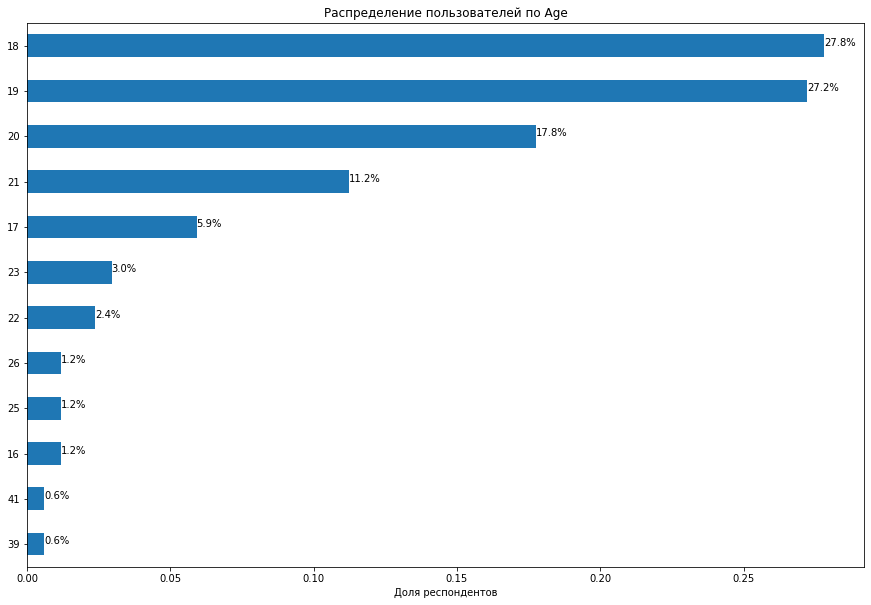

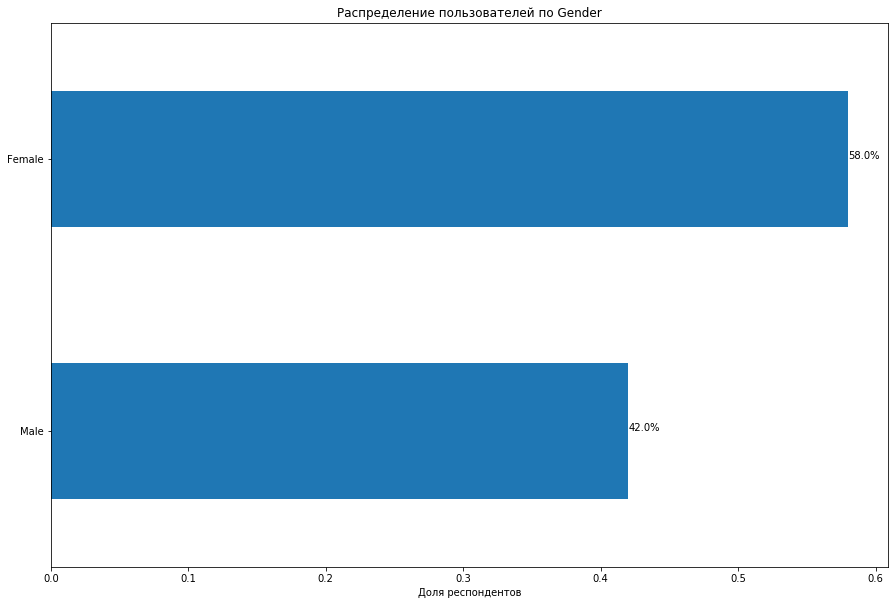

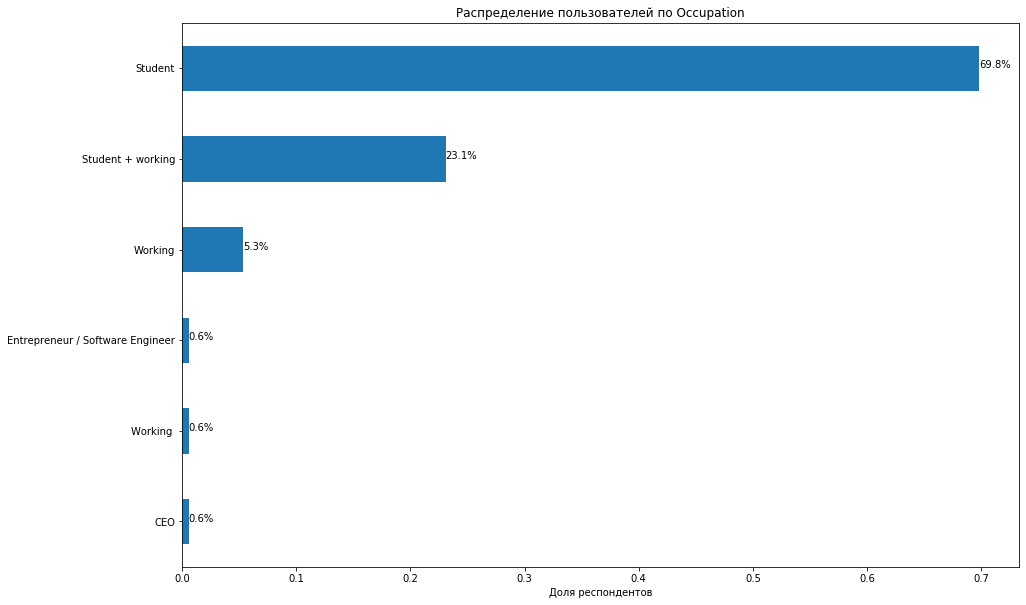

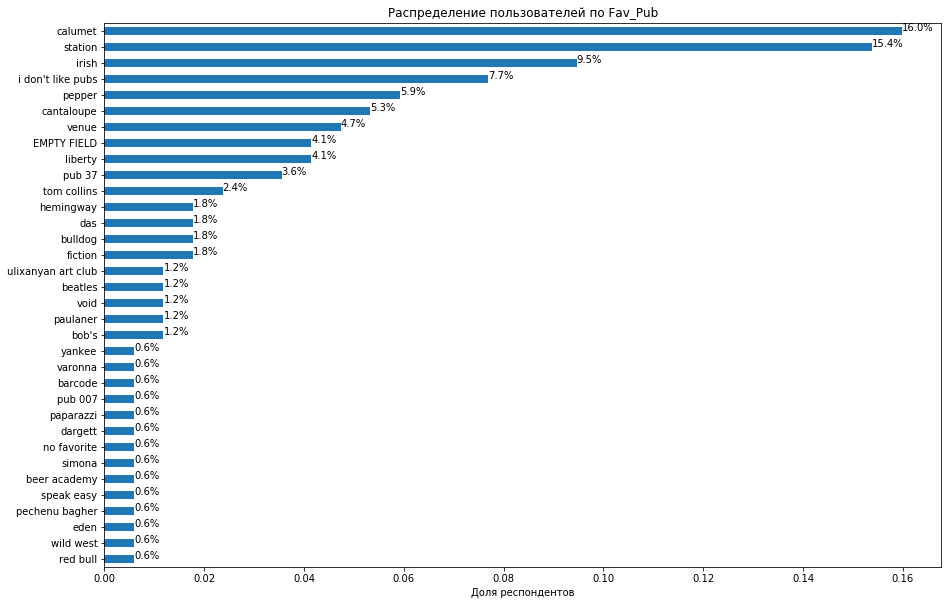

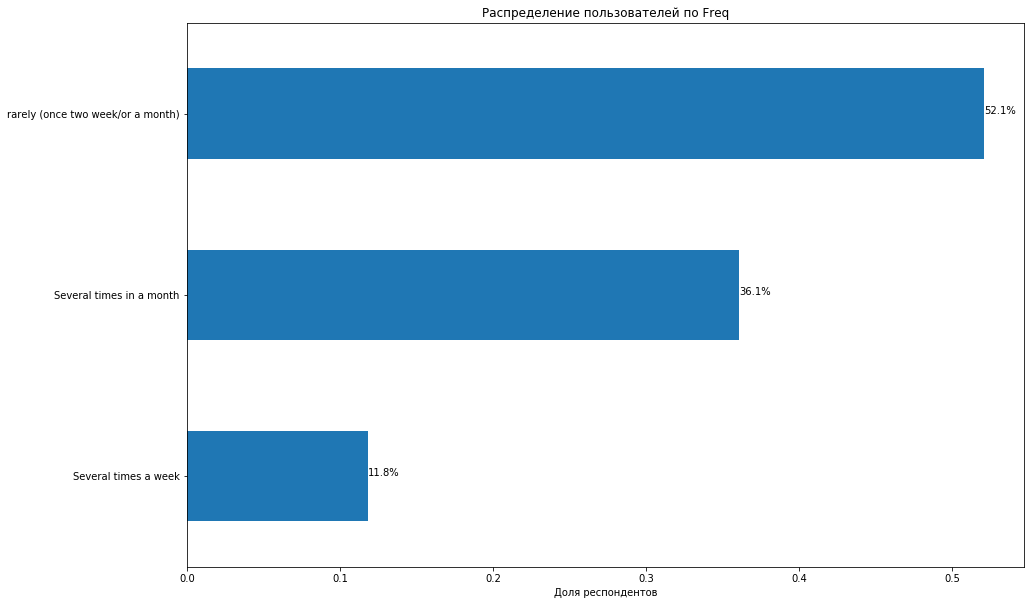

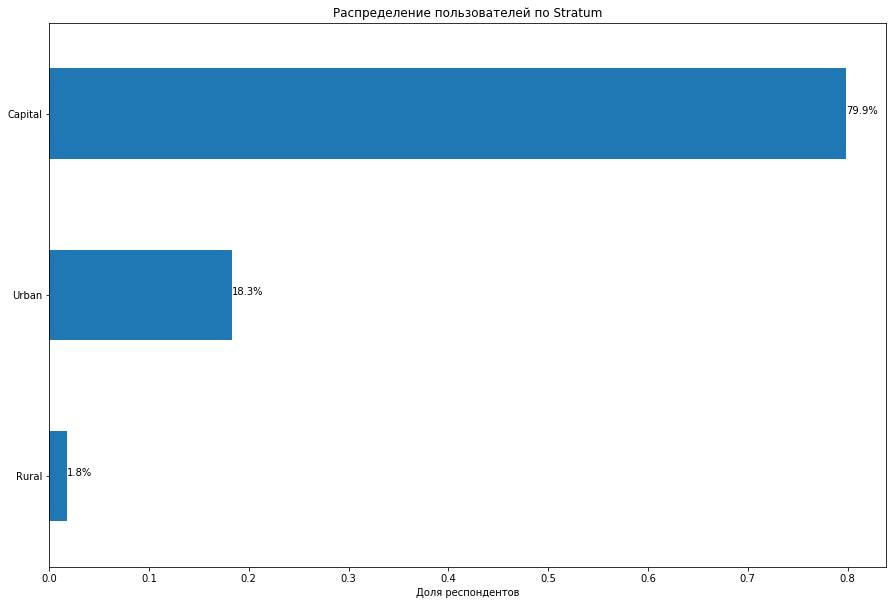

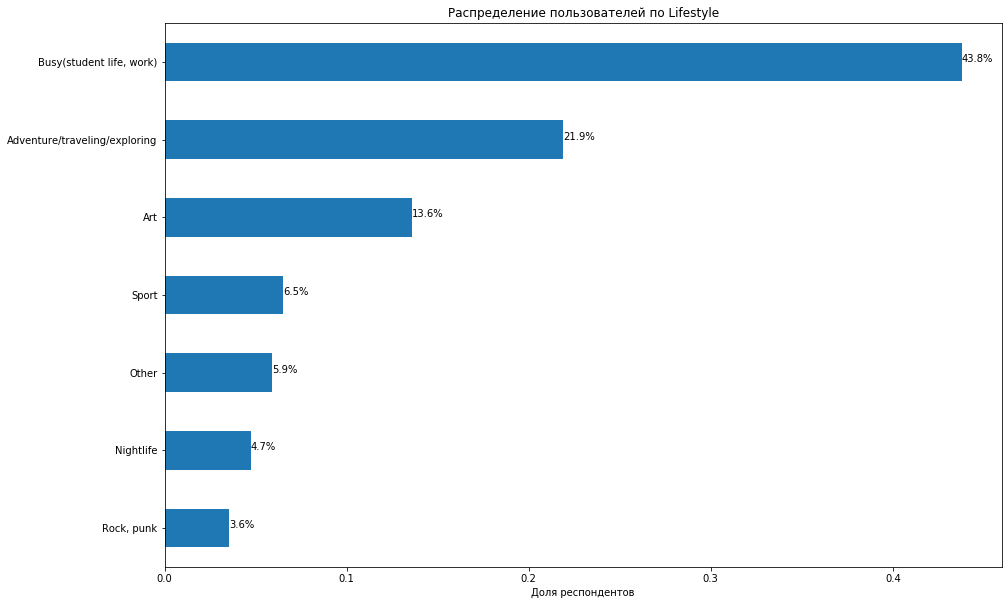

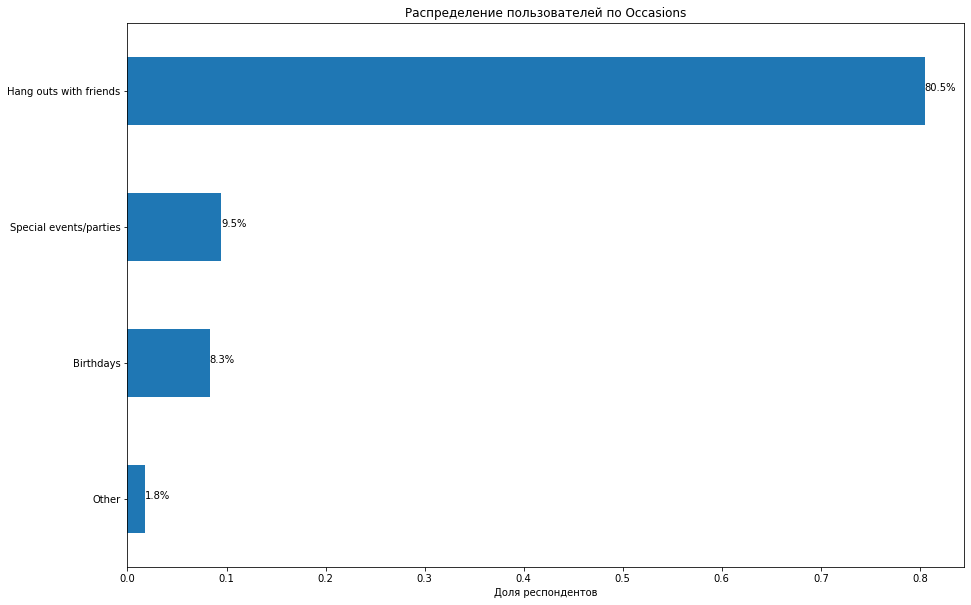

In [385]:
сols = ['Age', 'Gender',  'Occupation', 'Fav_Pub', 'Freq',
        'Stratum', 'Lifestyle', 'Occasions']
for col in сols:
    info_plot(armenian_pubs, col)
    

In [388]:
# видим очень большое отличие максимума от среднего => стоит посмотреть повнимательнее как распределены доходы (можно посмотреть персентили)
armenian_pubs.Income.min(),armenian_pubs.Income.max(),armenian_pubs.Income.mean()

(0.0, 4500000.0, 109896.5976331361)

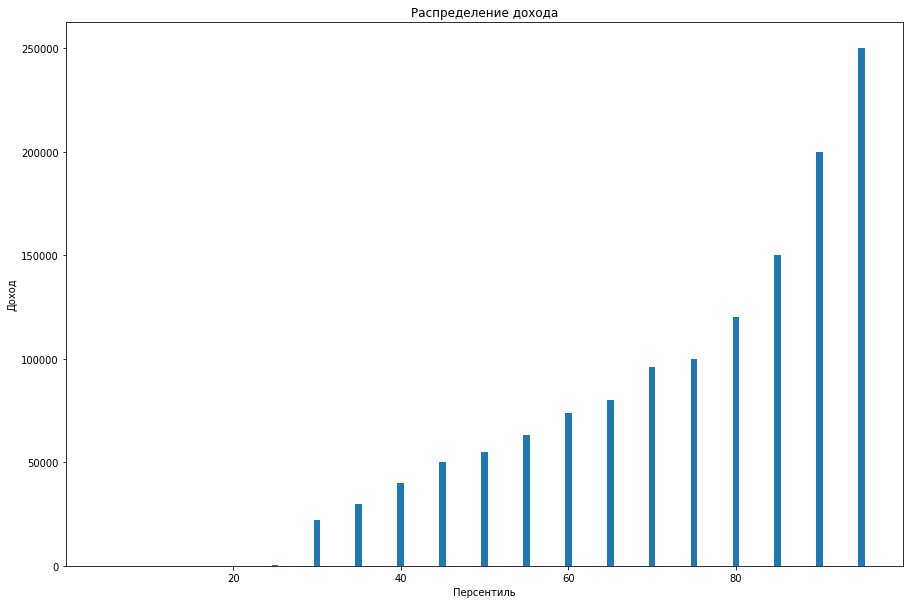

In [389]:
perc = [np.percentile(armenian_pubs.Income,k) for k in range(5,100,5)]
plt.bar(range(5,100,5),perc )
plt.title('Распределение дохода')
plt.xlabel('Персентиль')
plt.ylabel('Доход')
plt.show()


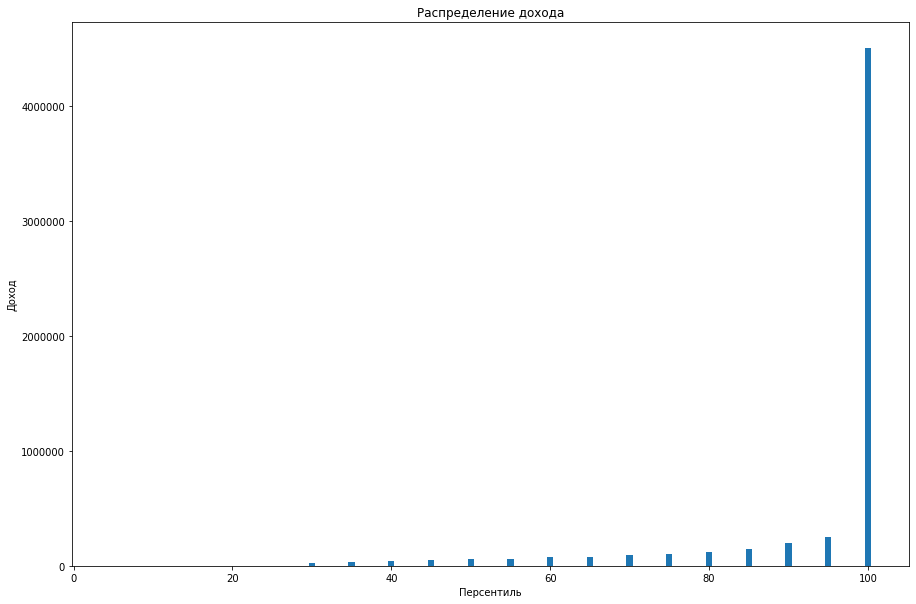

In [390]:
perc = [np.percentile(armenian_pubs.Income,k) for k in range(5,101,5)]
plt.bar(range(5,101,5),perc )
plt.title('Распределение дохода')
plt.xlabel('Персентиль')
plt.ylabel('Доход')
plt.show()
# видим явный выброс

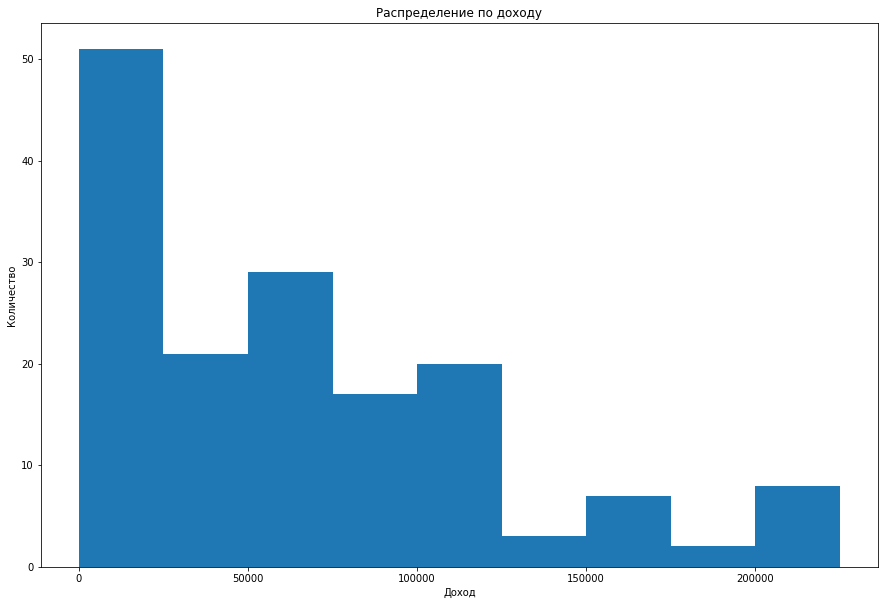

In [398]:
#распределение по доходу
plt.hist(armenian_pubs.Income,bins = range(0, 250000,25000))
plt.title('Распределение по доходу')
plt.xlabel('Доход')
plt.ylabel('Количество')
plt.show()

In [399]:
armenian_pubs.WTS.min(),armenian_pubs.WTS.max(),armenian_pubs.WTS.mean()

(0.0, 30000.0, 4917.15976331361)

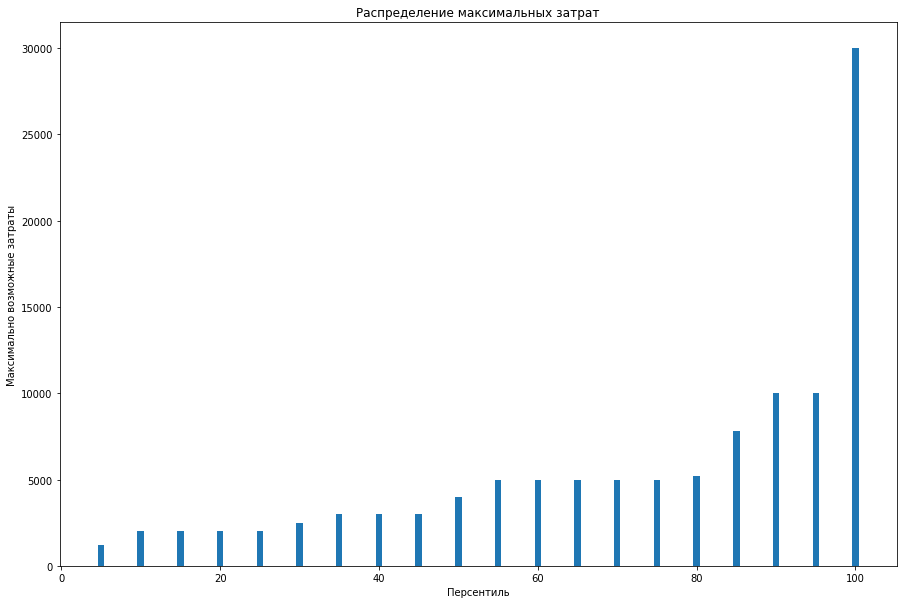

In [402]:
perc2 = [np.percentile(armenian_pubs.WTS,k) for k in range(5,101,5)]
plt.bar(range(5,101,5),perc2 )
plt.title('Распределение максимальных затрат')
plt.xlabel('Персентиль')
plt.ylabel('Максимально возможные затраты')
plt.show()


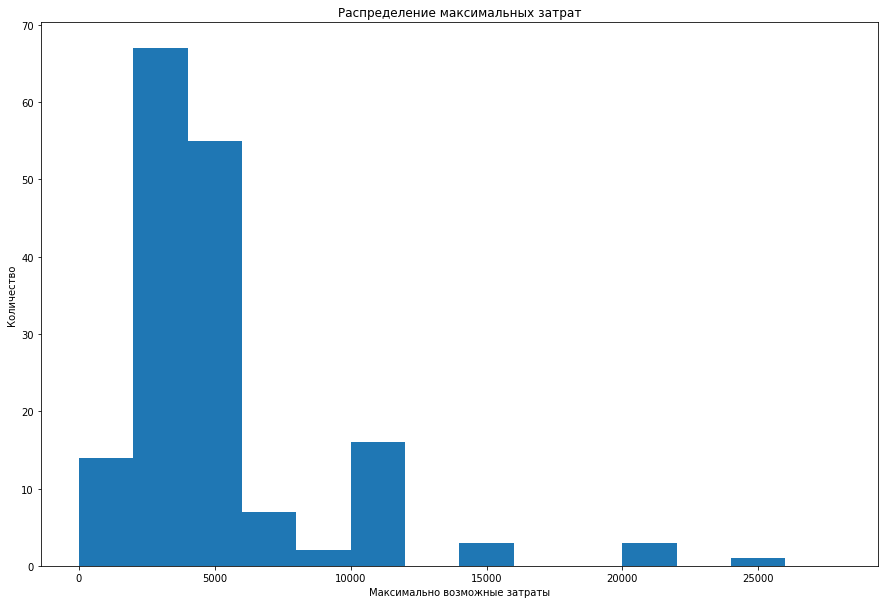

In [409]:
#распределение по сумме, которую готовы потратить в пабе
plt.hist(armenian_pubs.WTS,bins = range(0,30000,2000))
plt.title('Распределение максимальных затрат')
plt.xlabel('Максимально возможные затраты')
plt.ylabel('Количество')
plt.show()

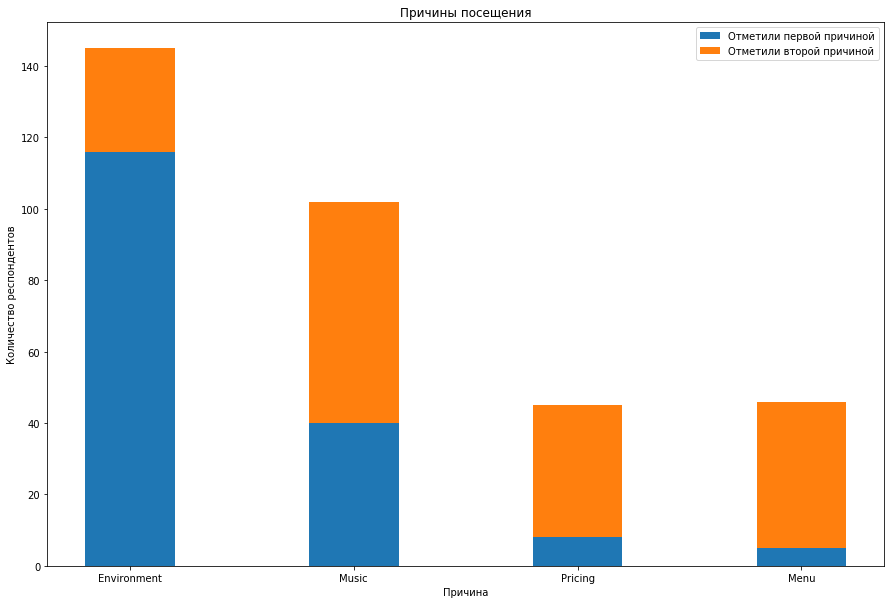

In [412]:
width = 0.40
plt.title('Причины посещения')
p1 = plt.bar(armenian_pubs.Prim_Imp.value_counts().index,armenian_pubs.Prim_Imp.value_counts(), width )
p2 = plt.bar(armenian_pubs.Prim_Imp.value_counts().index,armenian_pubs.Sec_Imp.value_counts()[armenian_pubs.Prim_Imp.value_counts().index], width, bottom=armenian_pubs.Prim_Imp.value_counts())
plt.ylabel('Количество респондентов')
plt.xlabel('Причина')
plt.legend((p1[0], p2[0]), ('Отметили первой причиной', 'Отметили второй причиной'))
plt.show()

In [429]:
# Хотим исследовать в каких ситуациях люди тратят больше всего денег чтобы, например, проводить акции (скидка именинникам, скидка большой компании итд)
# Гипотеза H0 - люди тратят на день рождения денег больше, чем при других случаях т.к. это важный повод
# тогда получается, что средние затраты при этих причинах должны быть смещены вправо


Occasion: Hang outs with friends
count      136.000000
mean      4926.470588
std       4515.212727
min          0.000000
25%       2000.000000
50%       4000.000000
75%       5000.000000
max      30000.000000
Name: WTS, dtype: float64 

Occasion: Special events/parties
count       16.000000
mean      3625.000000
std       2269.361144
min       1000.000000
25%       2000.000000
50%       3250.000000
75%       5000.000000
max      10000.000000
Name: WTS, dtype: float64 

Occasion: Birthdays
count       14.000000
mean      6785.714286
std       3964.817804
min       2000.000000
25%       3250.000000
50%       7000.000000
75%      10000.000000
max      15000.000000
Name: WTS, dtype: float64 

Occasion: Other
count       3.000000
mean     2666.666667
std       763.762616
min      2000.000000
25%      2250.000000
50%      2500.000000
75%      3000.000000
max      3500.000000
Name: WTS, dtype: float64 



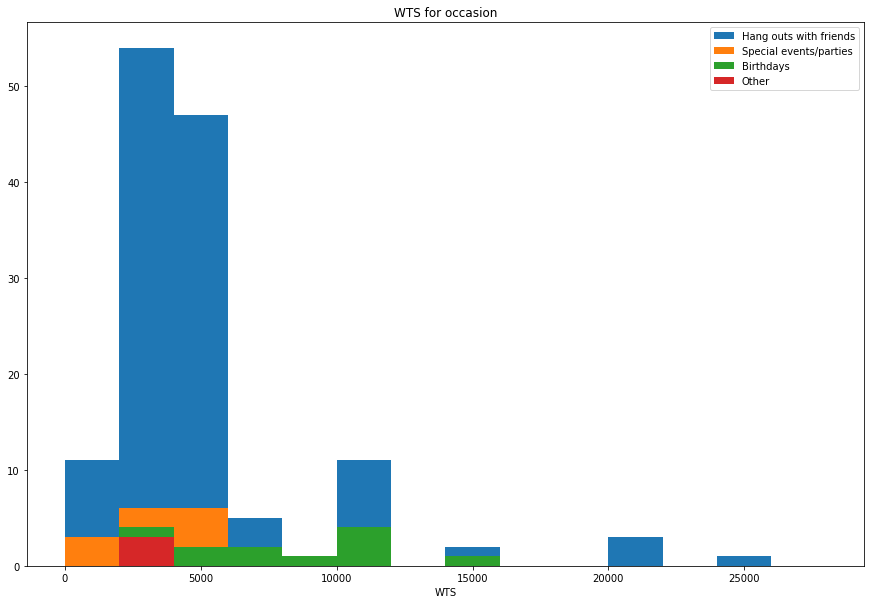

In [430]:
for i in armenian_pubs.Occasions.unique():
    plt.hist(armenian_pubs[armenian_pubs.Occasions == i].WTS, bins = range(0,30000,2000), label = i)
    print('Occasion: ' + i)
    print(armenian_pubs[armenian_pubs.Occasions == i].WTS.describe(),'\n')
    plt.title('WTS for occasion')
    plt.xlabel('WTS')
    plt.legend()
plt.show()

Occasion: Hang outs with friends
count      136.000000
mean      4926.470588
std       4515.212727
min          0.000000
25%       2000.000000
50%       4000.000000
75%       5000.000000
max      30000.000000
Name: WTS, dtype: float64 



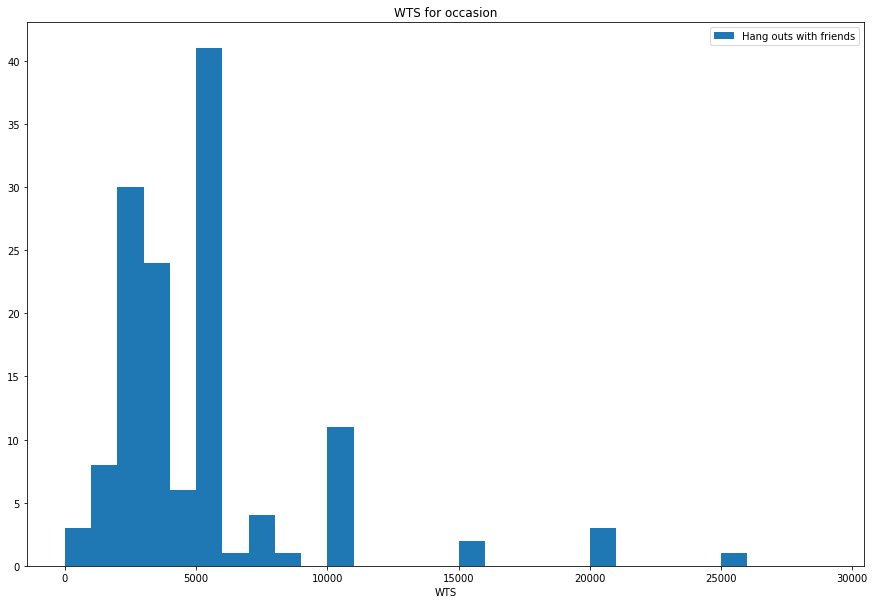

Occasion: Birthdays
count       14.000000
mean      6785.714286
std       3964.817804
min       2000.000000
25%       3250.000000
50%       7000.000000
75%      10000.000000
max      15000.000000
Name: WTS, dtype: float64 



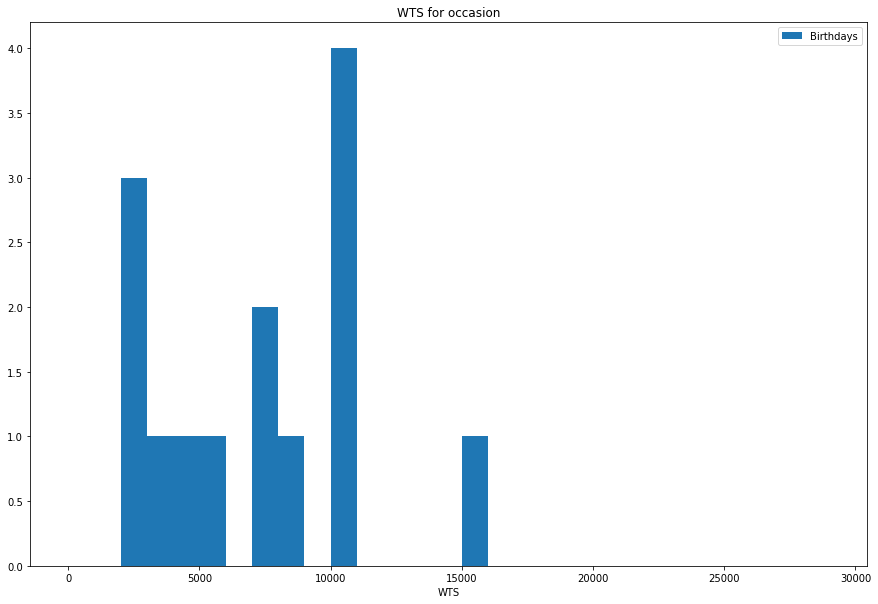

In [448]:
# интересное наблюдение - эти два распределения немного похожи на лог нормальные :)
for i in ['Hang outs with friends', 'Birthdays']:
    plt.hist(armenian_pubs[armenian_pubs.Occasions == i].WTS, bins = range(0,30000,1000), label = i)
    print('Occasion: ' + i)
    print(armenian_pubs[armenian_pubs.Occasions == i].WTS.describe(),'\n')
    plt.title('WTS for occasion')
    plt.xlabel('WTS')
    plt.legend()
    plt.show()

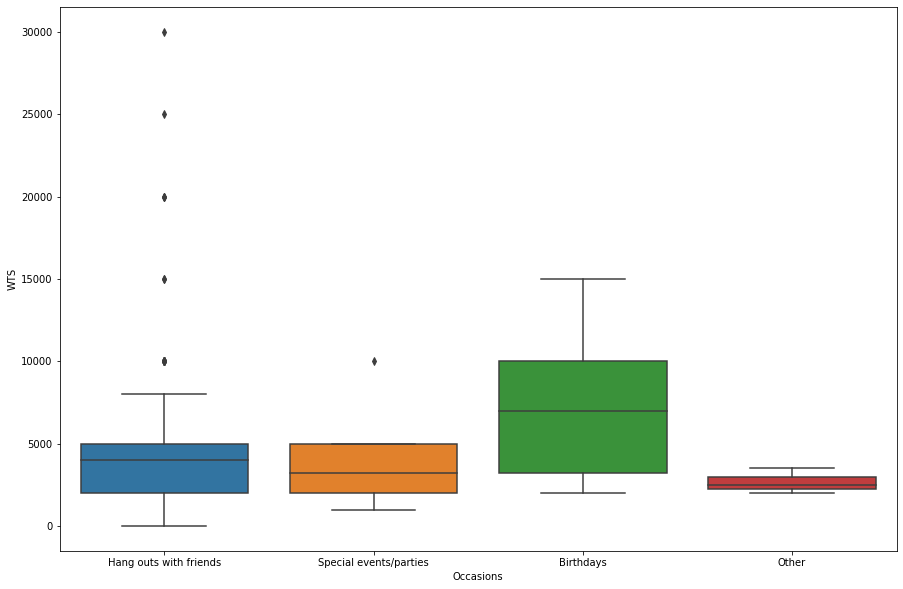

In [439]:
sns.boxplot(x='Occasions', y='WTS', data=armenian_pubs)
plt.show()

In [450]:
for i in armenian_pubs.Occasions.unique():
    print(i,np.asarray(armenian_pubs[armenian_pubs.Occasions == i].WTS))

Hang outs with friends [ 2000.  2000.  3000.  3000. 10000.  2000.  1000.  2000. 10000.  3000.
     0.  2000.  2000.  5000.  2000.  5000.  7000. 10000.  2000.  3000.
  2000.  2000.  2000.  5000. 20000.  1500.  4000.  5000.  5000.  8000.
  4000.  7000.  2000.  5000.  3000.  5000. 10000.  3000. 25000.  1000.
  5000.  1000.  5000.  3000.  3000.  4000.  2500.  2000.  3000.  7000.
  3000.  4000.  5000.  5000.  5000.  5000.  1500.  5000.     0.  3000.
  2000.  5000.  5000.  3000.  5000.  3000.  3000. 10000.  4000.  5000.
  5000.  2500.  2000.  7000.  5000.  2000.  3000. 20000.  5000. 10000.
  3000.  1500.  5000. 15000.  5000.  2000.  5000.  5000.  2000.  5000.
  3000.  2000.  5000. 10000.  1000. 30000. 10000.  2000.  3000.  2000.
 15000.  2000.  5000.  2000.  5000.  5000.  5000.  2000. 20000.  6000.
  5000.  5000.  5000.  3000.  5000.  5000.  2500.  2000. 10000.  4000.
  5000.  3000.  3000.  3000.  5000.  1500.  3000. 10000. 10000.  2000.
  3000.  2000.     0.  5000.  5500.  5000.]
Special ev

#### **C. Есть ли выраженная зависимость между доходом и количеством денег, которые человек готов потратить в пабе?** <a name="p43"></a>


#### **Ответ:**
> Не наблюдается выраженной зависмости между доходом и количеством денег, которые готовы потратить в пабе. Корреляция между величинами 0.23 

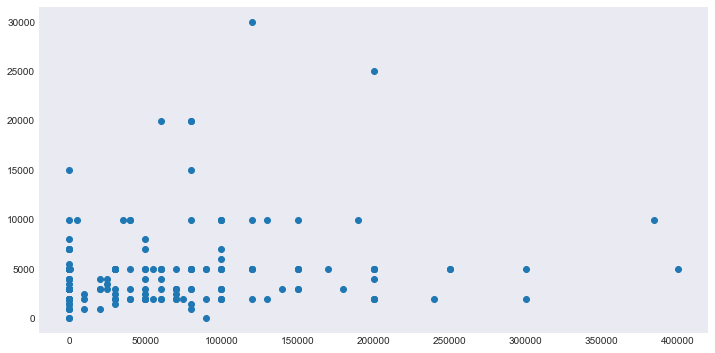

In [14]:
plt.scatter(ap[ap.Income<500000].Income,ap[ap.Income<500000].WTS)
plt.show()

In [15]:
#Корреляция Пирсона
ap.corr()

,Age,Income,WTS
Age,1.000000,0.163439,0.131371
Income,0.163439,1.000000,0.234652
WTS,0.131371,0.234652,1.000000


In [16]:
#Корреляция Спирмэна
ap.corr(method='spearman')

,Age,Income,WTS
Age,1.000000,0.357902,0.099272
Income,0.357902,1.000000,0.236219
WTS,0.099272,0.236219,1.000000


#### **D. Какую важнейшую причину посещения указывают люди, готовые потратить наибольшее количество денег?** <a name="p44"></a>


#### **Ответ:**
>- Environment (был чек на 30000) и  Music (был чек на 25000)
>- Самый большой медианный чек у тех, кто указывает  Music, как важнейшую причину для выбора заведения
>- Самой большой средний чек (на чеки до 10000) у тех, кто указывает  Music, как важнейшую причину для выбора заведения


In [17]:
for i in ap.Prim_Imp.unique():
    #Выводим описательные статистики по каждому Prim_Imp для WTS
    print('Prim_Imp: ' + i)
    print(ap[ap.Prim_Imp == i].WTS.describe())
    print('\n')

Prim_Imp: Environment
count      116.000000
mean      4922.413793
std       4275.615109
min          0.000000
25%       2000.000000
50%       5000.000000
75%       5000.000000
max      30000.000000
Name: WTS, dtype: float64


Prim_Imp: Music
count       40.000000
mean      5325.000000
std       4742.808321
min       1000.000000
25%       3000.000000
50%       4000.000000
75%       5000.000000
max      25000.000000
Name: WTS, dtype: float64


Prim_Imp: Pricing
count        7.000000
mean      3571.428571
std       3334.523597
min          0.000000
25%       1500.000000
50%       3000.000000
75%       4500.000000
max      10000.000000
Name: WTS, dtype: float64


Prim_Imp: Menu
count        5.000000
mean      4000.000000
std       3446.012188
min       1500.000000
25%       2000.000000
50%       3000.000000
75%       3500.000000
max      10000.000000
Name: WTS, dtype: float64




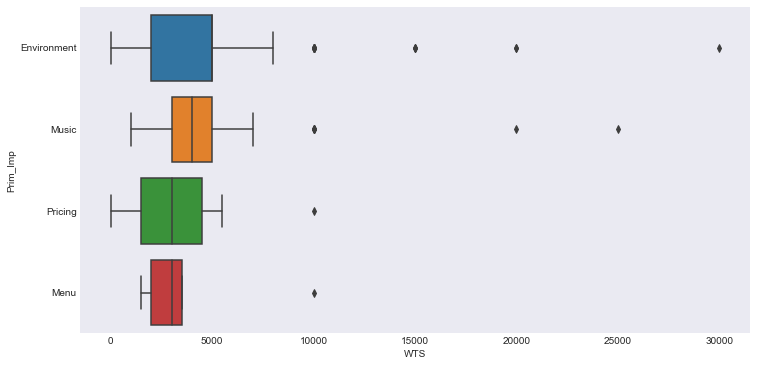

In [18]:
sns.boxplot(x='WTS', y='Prim_Imp', data=ap, orient='h')
plt.show()

In [19]:
#средний чек без выбросов(выбросы убрали, смотря на гистограмму выше) Требуется убирать экстремально большие занчения,
#так как среднее очень сильно не стабильно к выбросам
ap[ap.WTS <= 10000].groupby(['Prim_Imp']).WTS.mean()

Prim_Imp
Environment    4145.454545
Menu           4000.000000
Music          4421.052632
Pricing        3571.428571
Name: WTS, dtype: float64

#### **E. Действительно ли больше тратят те, кто чаще посещают пабы?** <a name="p45"></a>


#### **Ответ:**
> Нет явной завсимости 

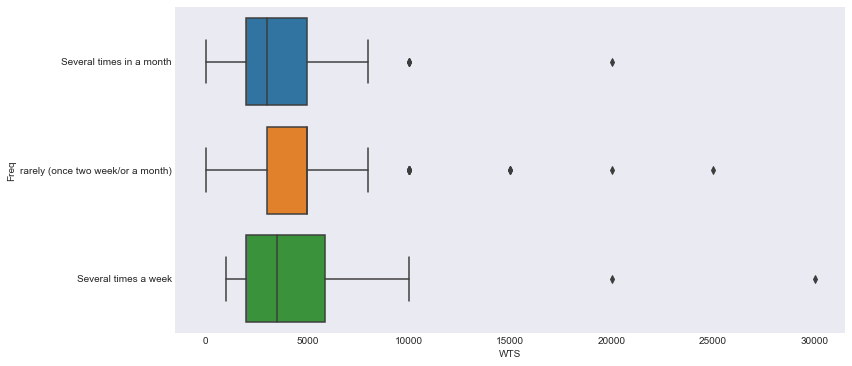

In [20]:
sns.boxplot(x='WTS', y='Freq', data=ap, orient='h')
plt.show()

#### **F. Люди какого образа жизни готовы тратить больше всего?** <a name="p46"></a>


#### **Ответ:**
>  "Busy(student life, work)", "Rock, punk"

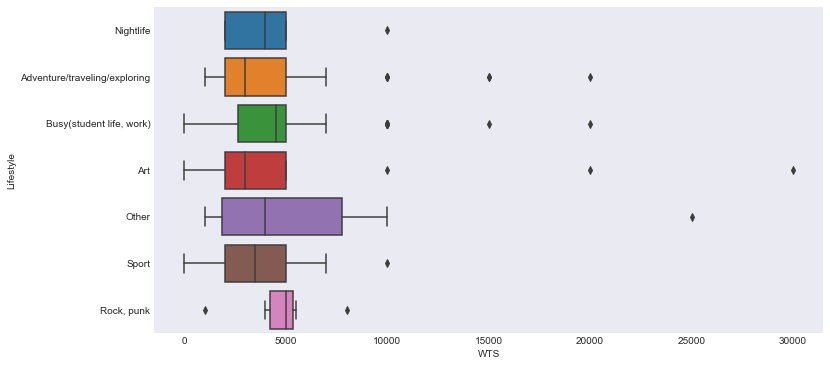

In [21]:
sns.boxplot(x='WTS', y='Lifestyle', data=ap, orient='h')
plt.show()

#### **G. Действительно ли больше тратят те, кто живет в столице?** <a name="p47"></a>


#### **Ответ:**
>  Нет

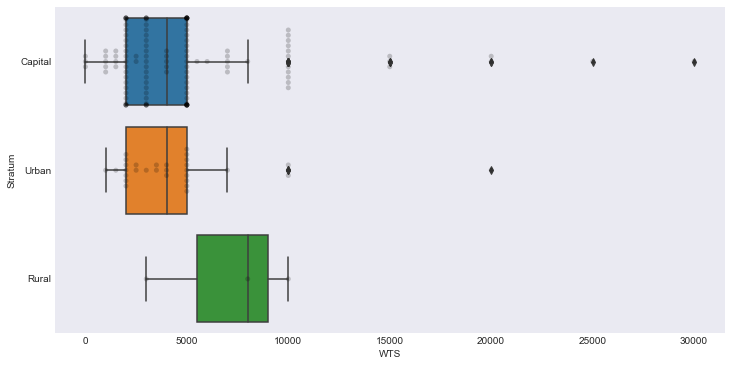

In [22]:
sns.boxplot(x='WTS', y='Stratum', data=ap, orient='h')
sns.swarmplot(x='WTS', y='Stratum', data=ap, orient='h',color = 'black',alpha = 0.2)
plt.show()

In [23]:
ap.Stratum.value_counts()

Capital    134
Urban       31
Rural        3
Name: Stratum, dtype: int64

#### **H. Действительно ли мужчины тратят больше?** <a name="p48"></a>
> Мужчины тратят больше девушек (средний чек, медиана, персентили у мужчин выше)

Gender: Male
count       70.000000
mean      6085.714286
std       4893.038110
min          0.000000
25%       3000.000000
50%       5000.000000
75%       7000.000000
max      25000.000000
Name: WTS, dtype: float64


Gender: Female
count       98.000000
mean      4112.244898
std       3669.693807
min          0.000000
25%       2000.000000
50%       3000.000000
75%       5000.000000
max      30000.000000
Name: WTS, dtype: float64




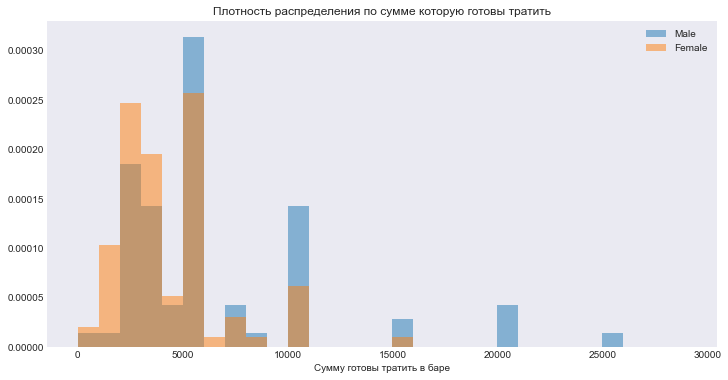

In [24]:
for i in ap.Gender.unique():
    #Выводим графики распределенией
    plt.hist(ap[ap.Gender == i].WTS,bins = range(0,30000,1000),label = i, alpha = 0.5, density = 1)
    #Выводим описательные статистики по каждому Genger для WTS
    print('Gender: ' + i)
    print(ap[ap.Gender == i].WTS.describe())
    print('\n')
plt.title('Плотность распределения по сумме которую готовы тратить')
plt.xlabel('Сумму готовы тратить в баре')
plt.legend()
plt.show()

#### **H. В каких пабах тратят больше?** <a name="p49"></a>
> Bulldog, Tom collins, Pauliner

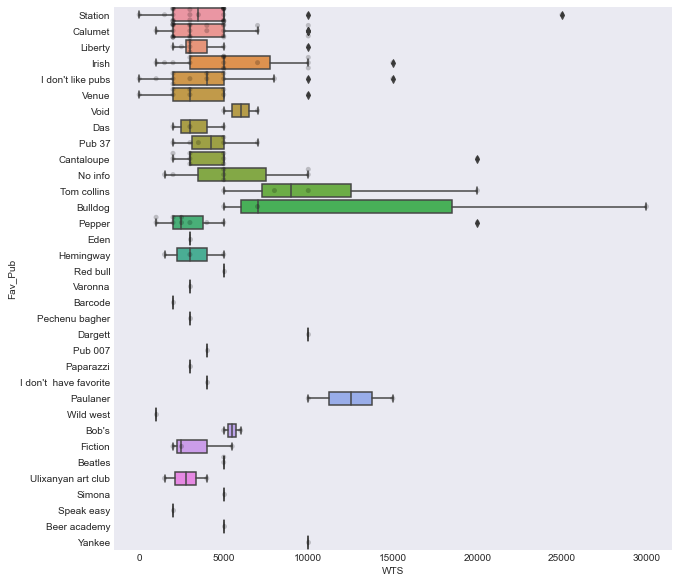

In [25]:
plt.figure(figsize=(10,10))
sns.boxplot(x='WTS', y='Fav_Pub', data=ap, orient='h')
sns.swarmplot(x='WTS', y='Fav_Pub', data=ap, orient='h',color = 'black',alpha = 0.2)
plt.show()

## **5. Итоговые результаты и выводы** <a name="p5"></a>

В работе был проведён анализ анкет, заполненных студентами о пабах. В ходе анализа были получены интересные наблюдения, которые могут бизнесменам открыть новый паб или текущим пабам увеличить выручку

#### A. Что важно для пользователя при выбора паба?<a name="p51"></a> 

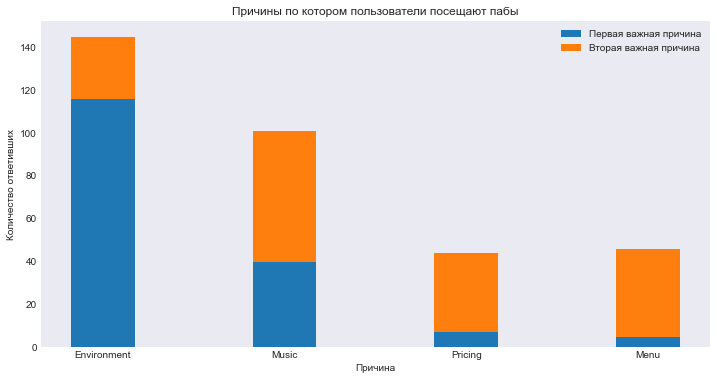

In [26]:
width = 0.35       # the width of the bars: can also be len(x) sequence
plt.title('Причины по котором пользователи посещают пабы')

p1 = plt.bar(ap.Prim_Imp.value_counts().index,ap.Prim_Imp.value_counts(), width )
p2 = plt.bar(ap.Prim_Imp.value_counts().index,ap.Sec_Imp.value_counts()[ap.Prim_Imp.value_counts().index], width, bottom=ap.Prim_Imp.value_counts())

plt.ylabel('Количество ответивших')
plt.xlabel('Причина')

plt.legend((p1[0], p2[0]), ('Первая важная причина', 'Вторая важная причина'))

plt.show()

#### Интерпретация графика
>- В первую очередь опрашиваемые выбирали `Environment`, когда отвечали, что для них важно при выборе баре (116 опрашиваемых из 168) и `Music` (40 опрашиваемых из 168 )
>- Во вторую очередь люди выбирали `Music`(61 опрашиваемых из 168), `Menu`(41 опрашиваемых из 168), `Pricing`(37 опрашиваемых из 168)
>- По совокупным ответам, можно сделать вывод, что самым важным критерием при выборе баре являются - **Environment** и **Music**

#### B.  Почему пользователи идут в паб? <a name="p52"></a> 

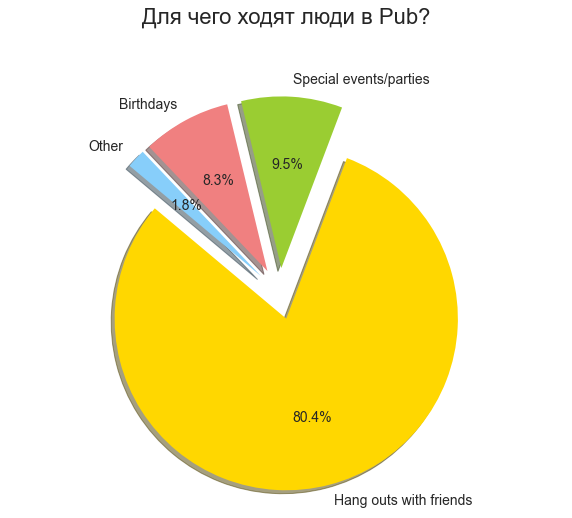

In [27]:
plt.figure(figsize=(10,8))

labels = ap.Occasions.value_counts().index
sizes = ap.Occasions.value_counts()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.15, 0.15, 0.15, 0.15)  # explode 1st slice

plt.title('Для чего ходят люди в Pub?\n\n',fontsize = 22)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 14})

plt.axis('equal')
plt.show()

In [28]:
ap.Occasions.value_counts()

Hang outs with friends    135
Special events/parties     16
Birthdays                  14
Other                       3
Name: Occasions, dtype: int64

#### Интерпретация графика
>- **80%** опрошенных идут в паб, чтобы провести хорошо время с друзьями - `Hang outs with friends`
>- **9.5%**  опрошенных идут в паб, на вечеринку - `Special events/parties`
>- **8.3%**  опрошенных идут в паб, на день рождение - `Birthdays `
>- **меньше 2%** опрошенных идут в паб, по иной причине - `Other`

#### С.  Чеки пользоватлей в зависимости от причины похода в паб? <a name="p53"></a> 

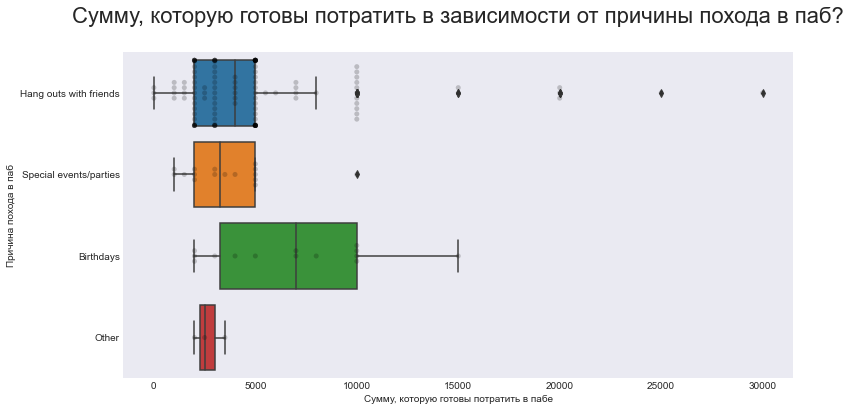

In [29]:
plt.title('Сумму, которую готовы потратить в зависимости от причины похода в паб?\n',fontsize = 22)
sns.boxplot(x='WTS', y='Occasions', data=ap, orient='h')
sns.swarmplot(x='WTS', y='Occasions', data=ap, orient='h',color = 'black',alpha = 0.2)
plt.xlabel('Сумму, которую готовы потратить в пабе')
plt.ylabel('Причина похода в паб')
plt.show()

#### Интерпретация графика
>- Люди которые приходят в паб по случаю - провести время с друзьями(`Hang out with friends`) имеют различные чеки
>- Люди которые приходят в паб по случаю - специального события или вечеринки (`Special events/parties`) имеют чеки меньше
>- Люди которые приходят в паб по случаю - дня рождения (`Birthdays`) имеют самые высокие чеки 
>- Люди со случаем `Other` не подвергаются анализу, так как не указали случай посещения паба

## **6. Рекомендации** <a name="p6"></a>

**Стоит обращать особое внимание на:**
>-  `Environment`(Атмосферу) и `Music` (Музыку) в вашем заведении (посетителям это важно)
>-  Удобство для провождения времени с друзьями - `Hang outs with friends` - самая частая причина похода в паб
>-  При рекламных кампаний и привлечении новых пользователей стоит ставить акцент на аудитории, у которых в скором времени День Рождения, так как у них самые большие чеки, это позволит пабам увеличить `ARPPU`
>-   Уменьшаем количество мероприятий в пабах, так как они имеют самый маленький  `ARPPU` 

*ARPPU - Average revenue per paying user, средняя выручка на одного платящего пользователя